In [2]:
import os
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import three_to_index
from Bio.PDB.Polypeptide import one_to_three

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'

In [4]:
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


def get_A_B(pre, n=201, first_half=False, second_half=False,):
    # pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_3/gamma_mode_3"
    A = np.load(f"{pre}/average_A.npy", allow_pickle=True)
    B = np.load(f"{pre}/average_B.npy", allow_pickle=True)
    A_prime = np.load(f"{pre}/average_A_prime.npy", allow_pickle=True)
    half_B = np.load(f"{pre}/average_half_B.npy", allow_pickle=True)
    other_half_B = np.load(f"{pre}/average_other_half_B.npy", allow_pickle=True)
    std_half_B = np.load(f"{pre}/average_std_half_B.npy", allow_pickle=True)
#     A = A[:n]
#     B = B[:n,:n]
#     A_prime = A_prime[:n]
#     half_B = half_B[:n,:n]
#     other_half_B = other_half_B[:n, :n]
#     std_half_B = std_half_B[:n, :n]
    if second_half:
        half_n = int(n/2)
        A = A[half_n:]
        B = B[half_n:,half_n:]
        A_prime = A_prime[half_n:]
        half_B = half_B[half_n:,half_n:]
        other_half_B = other_half_B[half_n:, half_n:]
        std_half_B = std_half_B[half_n:, half_n:]
    A_B_dic = {}
    A_B_dic["A"] = A
    A_B_dic["B"] = B
    A_B_dic["half_B"] = half_B
    A_B_dic["other_half_B"] = other_half_B
    A_B_dic["std_half_B"] = std_half_B
    A_B_dic["A_prime"] = A_prime
    return A_B_dic

def get_gamma(A, B, A_prime, c=-100, cutoff_range=range(100, 210, 10)):
    gamma_cutoff_dic = {}
    for cutoff in list(cutoff_range):
        # cutoff = 400
        lamb, P = np.linalg.eig(B)
        lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
        filtered_lamb = np.copy(lamb)
        cutoff_mode = cutoff
        filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                           cutoff_mode, P)
        B_inv = filtered_B_inv
        lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
        gamma_new = B_inv.dot(A-A_prime*lambda_2)
        gamma_cutoff_dic[cutoff] = gamma_new
    return gamma_cutoff_dic

In [24]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_submode_12/gamma/"
six_letter_submode12 = get_A_B(pre, n=690)
cutoff_range=list(range(190, 700, 10)) 
A_B = six_letter_submode12
gamma_six_letter_submode12 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

In [35]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/contact_submode12_cutoff550.dat", gamma_six_letter_submode12[550])

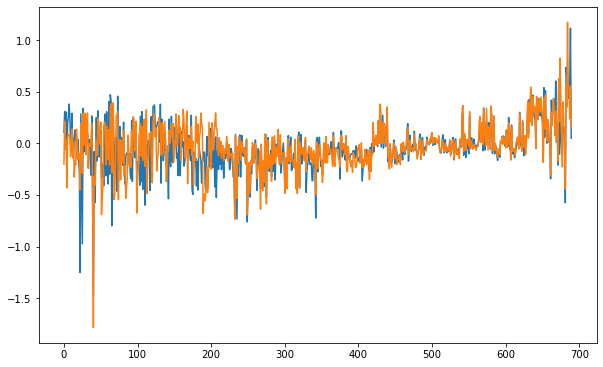

In [29]:
plt.plot(gamma_six_letter_submode12[450])
plt.plot(gamma_six_letter_submode9[450])

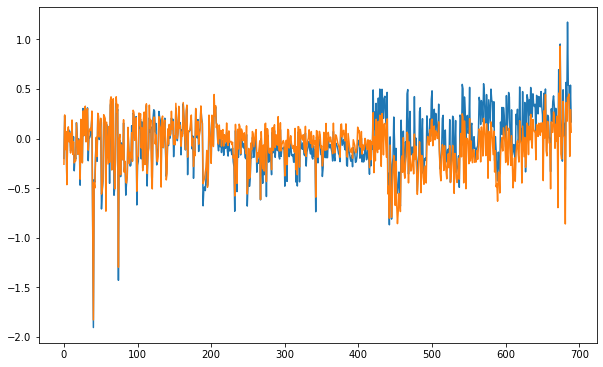

In [34]:

plt.plot(gamma_six_letter_submode9[550])
plt.plot(gamma_six_letter_mode9[550])

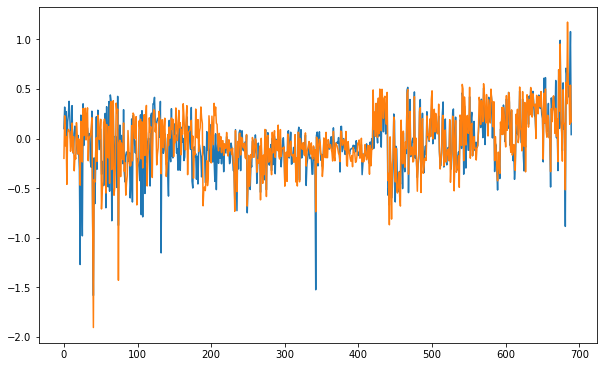

In [30]:
plt.plot(gamma_six_letter_submode12[550])
plt.plot(gamma_six_letter_submode9[550])

In [39]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_submode_9/gamma/"
six_letter_submode9 = get_A_B(pre, n=690)
cutoff_range=list(range(390, 700, 10)) 
A_B = six_letter_submode9
gamma_six_letter_submode9 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

In [ ]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_9/gamma/"
six_letter_mode9 = get_A_B(pre, n=690)


In [6]:
cutoff_range=list(range(190, 700, 10)) 
A_B = six_letter_mode9
gamma_six_letter_mode9 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

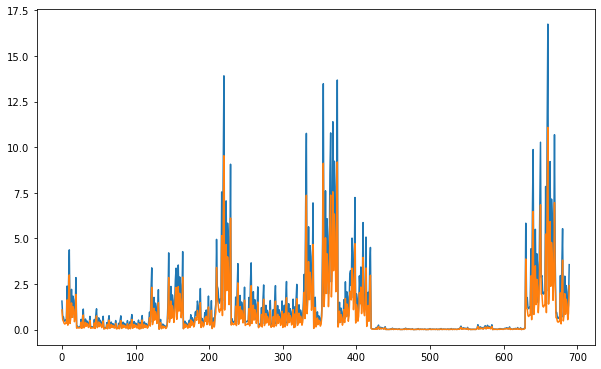

In [23]:
plt.plot(six_letter_submode9['A_prime'])
plt.plot(six_letter_mode9['A_prime'])

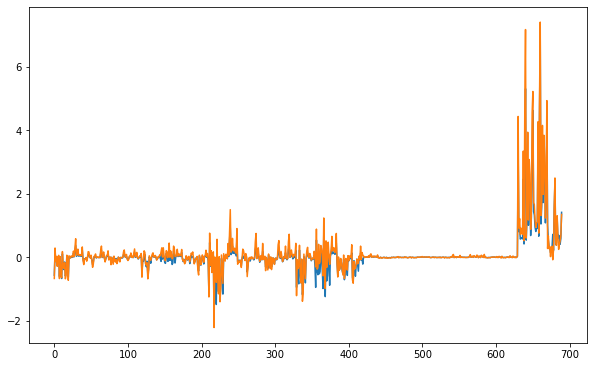

In [22]:
plt.plot(six_letter_mode9['A'])
plt.plot(six_letter_submode9['A'])

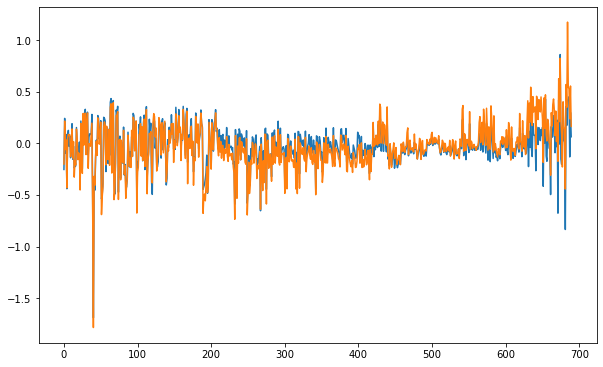

In [13]:
plt.plot(gamma_six_letter_mode9[450])
plt.plot(gamma_six_letter_submode9[450])

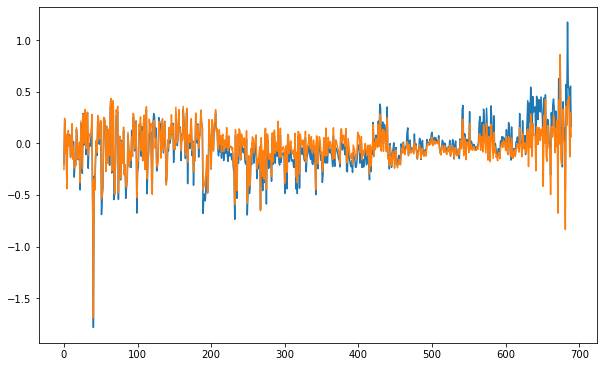

In [14]:
plt.plot(gamma_six_letter_submode9[450])
plt.plot(gamma_six_letter_mode9[450])


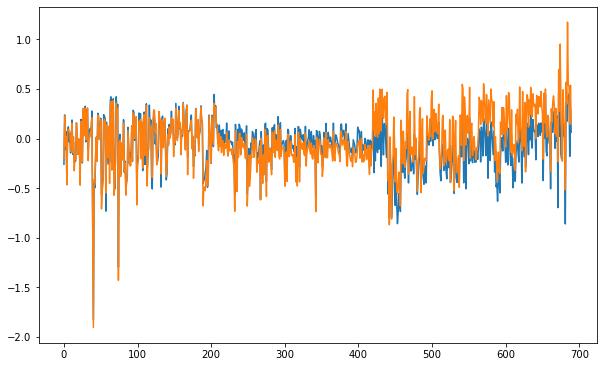

In [7]:
plt.plot(gamma_six_letter_mode9[550])
plt.plot(gamma_six_letter_submode9[550])

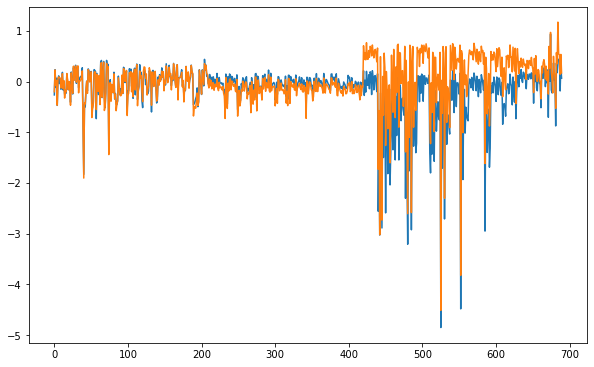

In [8]:
plt.plot(gamma_six_letter_mode9[690])
plt.plot(gamma_six_letter_submode9[690])

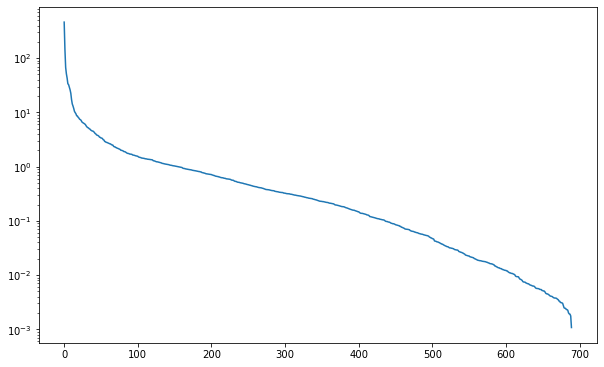

In [30]:
B = A_B['B']
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
plt.plot(lamb)
plt.yscale("log")

In [31]:
gamma = gamma_six_letter_mode9[680]
A_B['A'].dot(gamma)

16.94385165767069

In [32]:
A_B['A_prime'].dot(gamma)

-3.164135620181696e-15

In [33]:
np.sqrt(gamma.dot(A_B['B']).dot(gamma))

4.114337810892066

In [34]:
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

4.118245131164119

In [15]:
gamma = gamma_six_letter_mode9[550]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

4.062342945633896

In [16]:
gamma = gamma_six_letter_mode9[450]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

4.012557519208387

In [17]:
A_B = six_letter_submode9
gamma = gamma_six_letter_submode9[450]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

6.4845799398085475

In [19]:
A_B = six_letter_submode9
gamma = gamma_six_letter_mode9[450]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

5.374919819739599

In [18]:
A_B = six_letter_mode9
gamma = gamma_six_letter_submode9[450]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

3.345460992957597

In [47]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/contact_cutoff550.dat", gamma_six_letter_mode9[550])

In [39]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/contact_cutoff450.dat", gamma_six_letter_mode9[450])

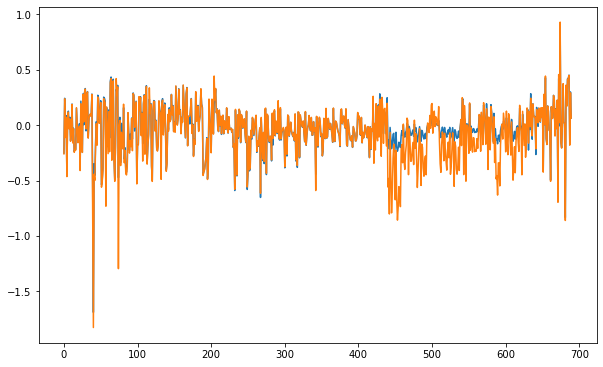

In [37]:
plt.plot(gamma_six_letter_mode9[450])
plt.plot(gamma_six_letter_mode9[550])

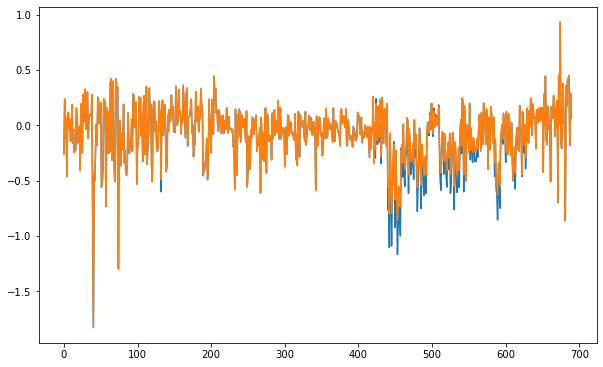

In [36]:
plt.plot(gamma_six_letter_mode9[580])
plt.plot(gamma_six_letter_mode9[550])

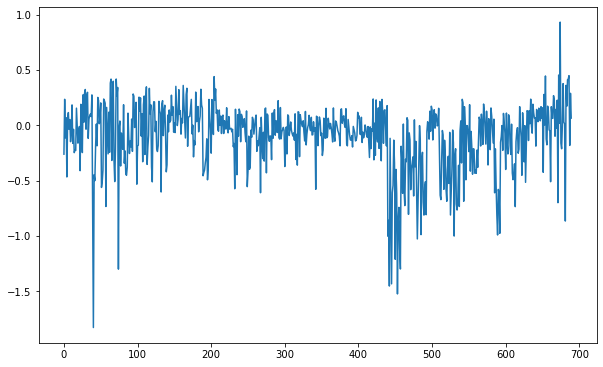

In [38]:
plt.plot(gamma_six_letter_mode9[600])

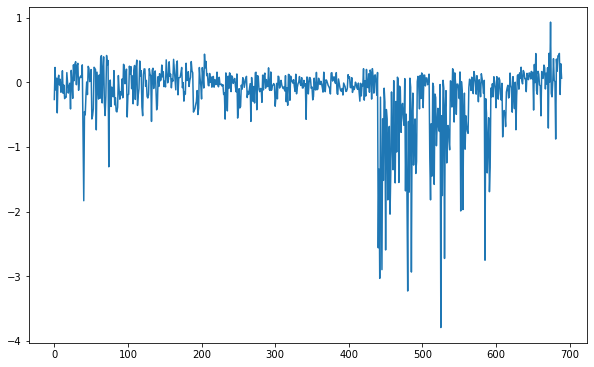

In [35]:
plt.plot(gamma_six_letter_mode9[680])

In [46]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/contact_cutoff680.dat", gamma_six_letter_mode9[680])

In [7]:
a = pd.read_csv("/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/optimization_msa_mode_7/info_folder/1ap9_A.csv", index_col=0)

In [11]:
b = pd.read_csv("/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/optimization_msa_mode_9/info_folder/1ap9_A_contact.csv", index_col=0)

In [16]:
a = a.assign(interactionTerm="contact")

In [17]:
pd.concat([a,b], sort=False)

,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,interactionTerm,Type
0,1.000000,0,4.0,148,152.0,parallel,PRO,TRP,ASN,LEU,486,contact,NaN
1,0.045489,1,5.0,147,151.0,parallel,GLU,LEU,LEU,THR,521,contact,NaN
2,1.000000,4,8.0,151,155.0,parallel,TRP,GLY,THR,MET,309,contact,NaN
3,0.898892,5,9.0,38,42.0,parallel,LEU,THR,TYR,LEU,527,contact,NaN
4,1.000000,5,9.0,42,38.0,anti,LEU,THR,LEU,TYR,1193,contact,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,0.000343,167,NaN,1,NaN,NaN,LEU,NaN,NaN,NaN,660,NaN,Burial
1227,0.000014,168,NaN,0,NaN,NaN,ILE,NaN,NaN,NaN,639,NaN,Burial
1228,0.999983,168,NaN,1,NaN,NaN,ILE,NaN,NaN,NaN,659,NaN,Burial
1229,0.993917,169,NaN,0,NaN,NaN,LEU,NaN,NaN,NaN,640,NaN,Burial


In [35]:
a = np.load("/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_10/phis/6uus_R.npy")

In [46]:
b = np.load("/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_10/A_B_dic/4bgn_A.npy", allow_pickle=True).item()

In [12]:
# mode 11 is the same as 10, just with filtered pdb list.(protein with enough MSA information)
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_11/gamma/"
six_letter_mode11 = get_A_B(pre, n=2022)


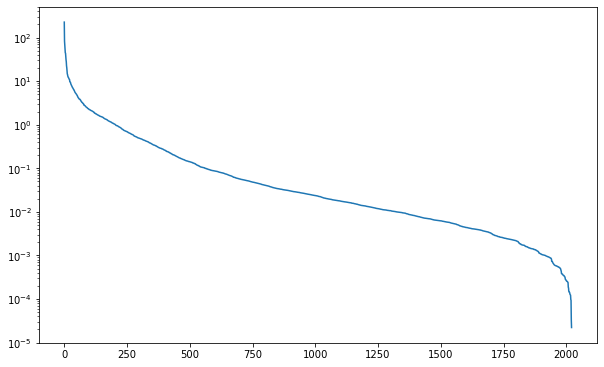

In [13]:
A_B = six_letter_mode11
B = A_B['B']
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
plt.plot(lamb)
plt.yscale("log")

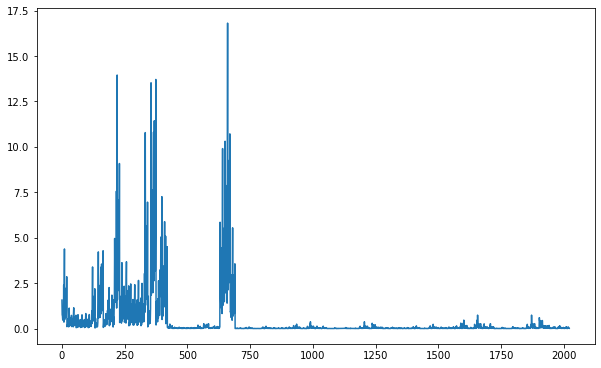

In [14]:
plt.plot(six_letter_mode11['A_prime'])

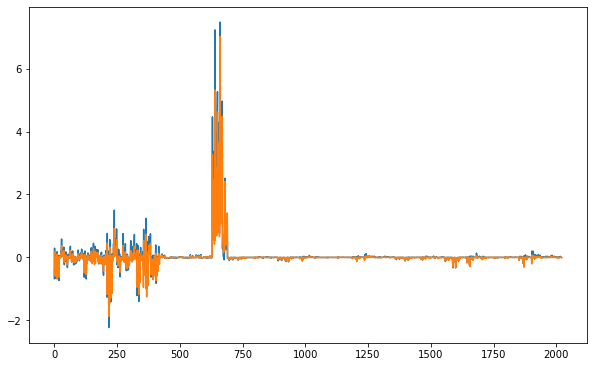

In [16]:
plt.plot(six_letter_mode11['A'])
plt.plot(six_letter_mode10['A'])

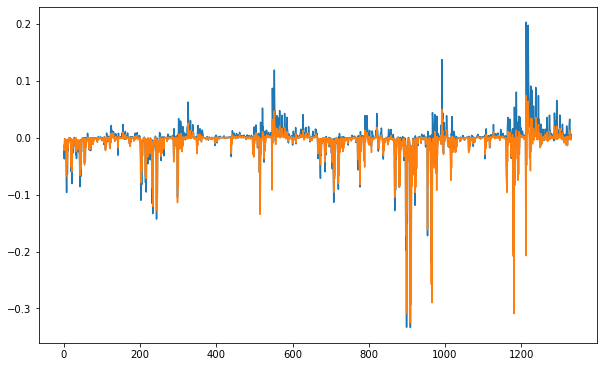

In [20]:
plt.plot(six_letter_mode11['A'][690:])
plt.plot(six_letter_mode10['A'][690:])

In [6]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_10/gamma/"
six_letter_mode10 = get_A_B(pre, n=2022)



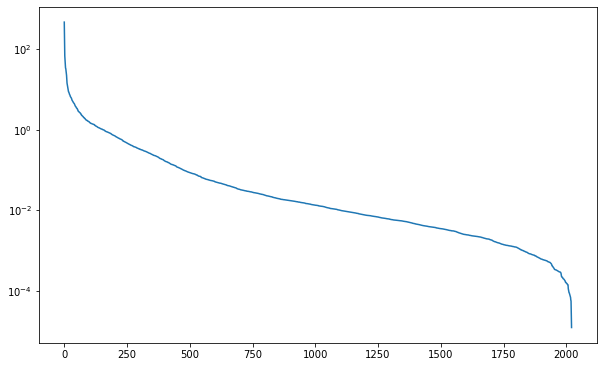

In [9]:
A_B = six_letter_mode10
B = A_B['B']
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
plt.plot(lamb)
plt.yscale("log")

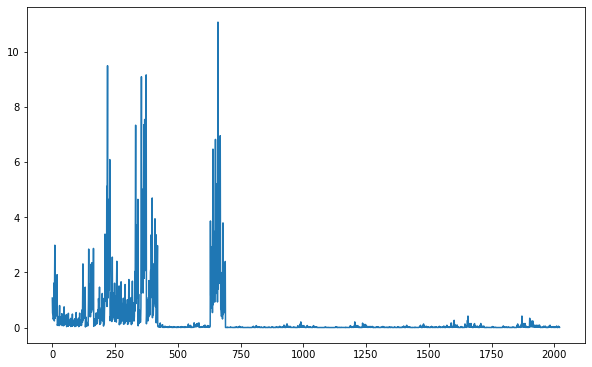

In [10]:
plt.plot(A_B['A_prime'])

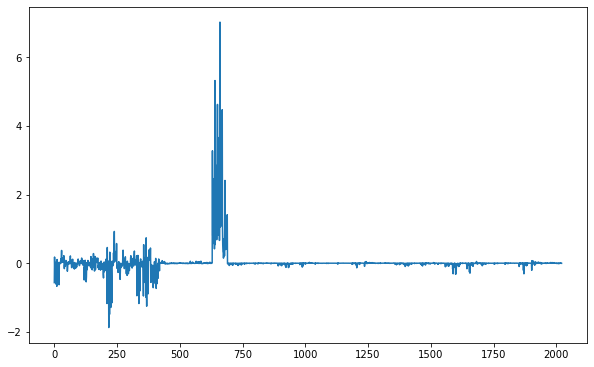

In [11]:
plt.plot(A_B['A'])

In [53]:
len(A_B['A'])

2022

In [31]:
A_B = six_letter_mode11
keep = 690
cutoff_range=list(range(522, 690, 30)) 
test_mode11 = get_gamma(A_B['A'][:keep], A_B['B'][:keep,:keep], A_B['A_prime'][:keep], c=-0, cutoff_range=cutoff_range)

# They are identical, which should be.

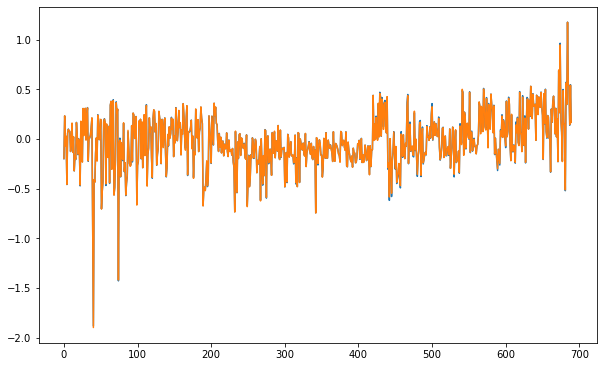

In [46]:
plt.plot(test_mode11[522])
plt.plot(gamma_six_letter_submode9[520])

# When putting contact term and four body term together, the new cutoff set to 722 will produce about the same result for the contact part.

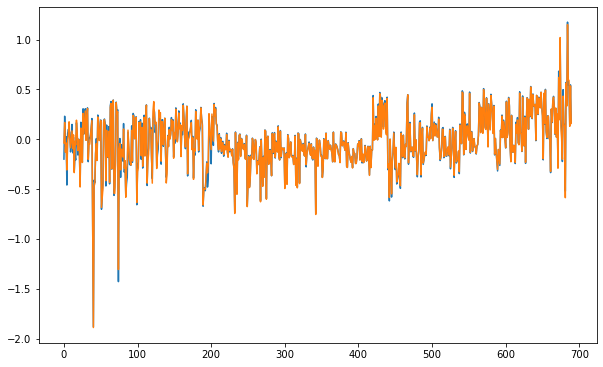

In [52]:
plt.plot(test_mode11[522])
plt.plot(gamma_six_letter_mode11[722][:690])

# the four body part also looks reasonable.

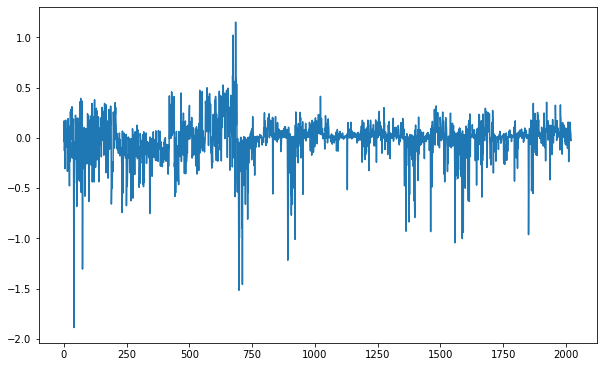

In [53]:
plt.plot(gamma_six_letter_mode11[722])

In [59]:
B = six_letter_mode11['B']
cutoff = 722
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)
B_new = np.linalg.inv(filtered_B_inv)

In [71]:
from cvxopt import matrix, solvers
A_B = six_letter_mode11
# B = A_B['B']
B = B_new
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')
additional_constraint = np.diag([-1]*n)
G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-45, -0]+[15]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  1.7882e+04 -8.5722e+04  1e+05  2e-16  1e+03
 1:  1.5337e+04  3.9541e+03  1e+04  3e-16  2e+02
 2:  1.0497e+04  6.6204e+03  4e+03  3e-16  9e+01
 3:  7.5406e+02 -1.2122e+04  1e+04  1e-15  9e+00
 4:  5.0663e+01 -6.8374e+02  7e+02  2e-16  3e-13
 5:  4.4588e+01  3.6735e+01  8e+00  2e-16  2e-13
 6:  4.4566e+01  4.4482e+01  8e-02  2e-16  1e-12
 7:  4.4563e+01  4.4561e+01  2e-03  2e-16  5e-11
 8:  4.4562e+01  4.4562e+01  6e-05  2e-16  1e-09
 9:  4.4562e+01  4.4562e+01  7e-07  2e-16  4e-08
Optimal solution found.


In [72]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

6.741067814870932 6.675500267293108 45.00000000001187 -0.00043547622491061716


In [66]:
x =gamma_six_letter_mode11[722]
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

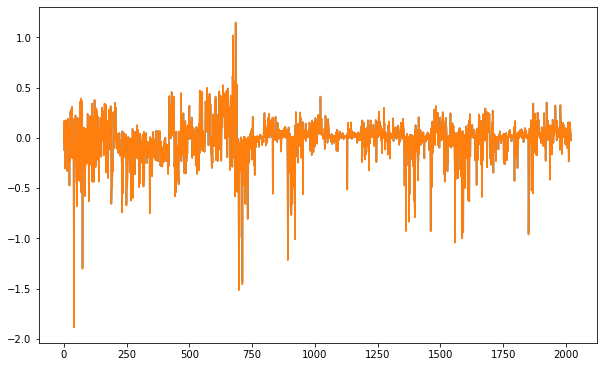

In [73]:
plt.plot(x)
plt.plot(gamma_six_letter_mode11[722])

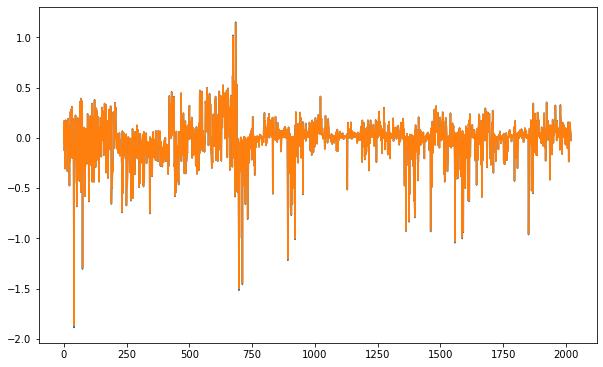

In [74]:

plt.plot(gamma_six_letter_mode11[722])
plt.plot(x)

In [75]:
toLocation = "/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder"
np.savetxt(f"{toLocation}/complete_cutoff722_contact_part.dat", x[:690])
np.savetxt(f"{toLocation}/complete_cutoff722_fourBody_part.dat", -x[690:])

In [102]:
from cvxopt import matrix, solvers
A_B = six_letter_mode11
# B = A_B['B']
B = B_new
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')
additional_constraint = np.diag([-1]*n)
G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-50, -0]+[15]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  1.7888e+04 -8.5698e+04  1e+05  3e-16  1e+03
 1:  1.5346e+04  3.9842e+03  1e+04  1e-15  2e+02
 2:  1.0499e+04  6.6270e+03  4e+03  1e-15  9e+01
 3:  7.6305e+02 -1.2083e+04  1e+04  7e-16  9e+00
 4:  6.0929e+01 -6.5867e+02  7e+02  2e-16  6e-13
 5:  5.5040e+01  4.7359e+01  8e+00  2e-16  2e-13
 6:  5.5019e+01  5.4937e+01  8e-02  2e-16  5e-12
 7:  5.5016e+01  5.5014e+01  1e-03  2e-16  1e-10
 8:  5.5015e+01  5.5015e+01  5e-05  2e-16  2e-09
Optimal solution found.


In [103]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

6.741065395385876 7.417225181521151 50.00000000093696 -0.023619865481372654


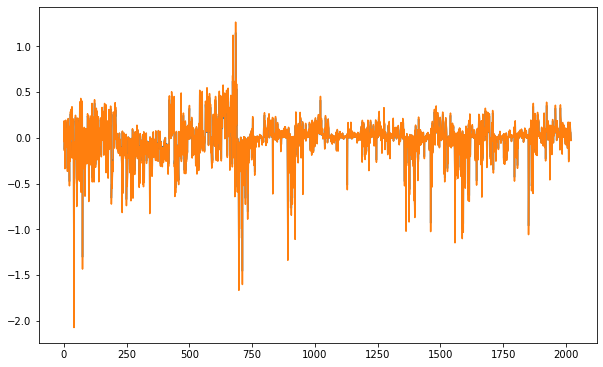

In [104]:
plt.plot(gamma_six_letter_mode11[722])
plt.plot(x)


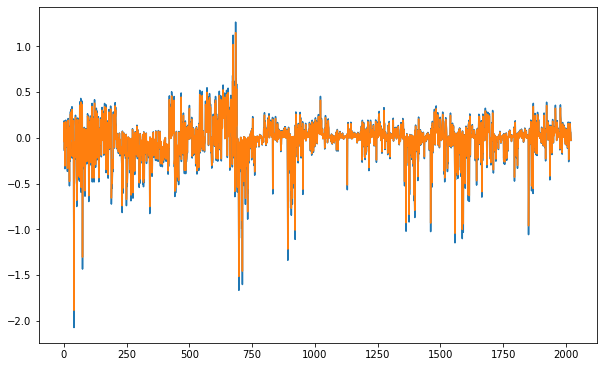

In [105]:
plt.plot(x)
plt.plot(gamma_six_letter_mode11[722])

In [26]:
# cutoff_range=list(range(190, 700, 20)) + list(range(1922, 2022, 10)) 
# cutoff_range=list(range(1622, 2032, 10))
A_B = six_letter_mode11
cutoff_range=list(range(522, 2122, 100)) 
gamma_six_letter_mode11 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

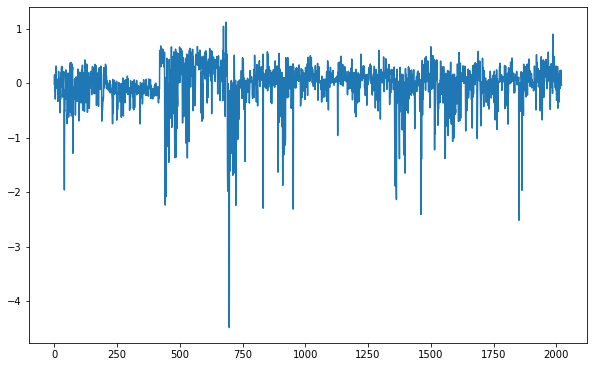

In [29]:
plt.plot(gamma_six_letter_mode11[1222])
# plt.plot(gamma_six_letter_mode10[1222])

In [23]:
# cutoff_range=list(range(190, 700, 20)) + list(range(1922, 2022, 10)) 
# cutoff_range=list(range(1622, 2032, 10))
A_B = six_letter_mode10
cutoff_range=list(range(522, 2122, 100)) 
gamma_six_letter_mode10 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

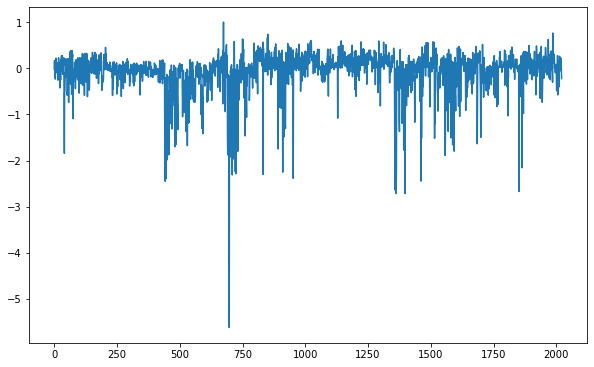

In [24]:
plt.plot(gamma_six_letter_mode10[1222])

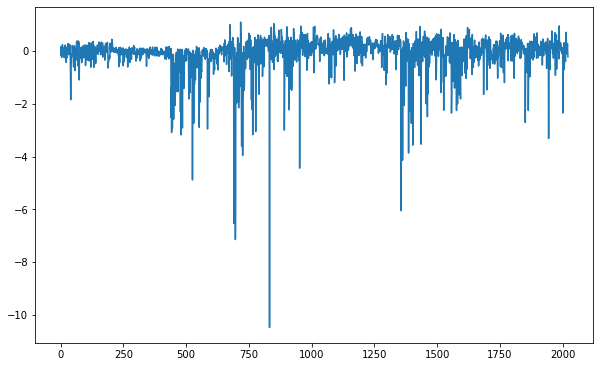

In [25]:
plt.plot(gamma_six_letter_mode10[1722])

In [ ]:
# cutoff_range=list(range(190, 700, 20)) + list(range(1922, 2022, 10)) 
cutoff_range=list(range(1622, 2032, 10)) 
gamma_six_letter_mode10 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

In [59]:
gamma = gamma_six_letter_mode10[1922]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

4.829197552897417

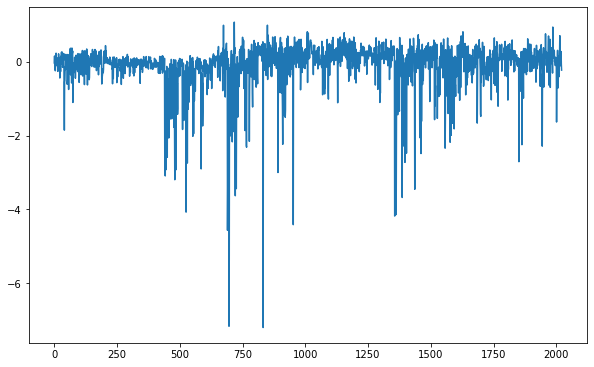

In [60]:
plt.plot(gamma_six_letter_mode10[1622])

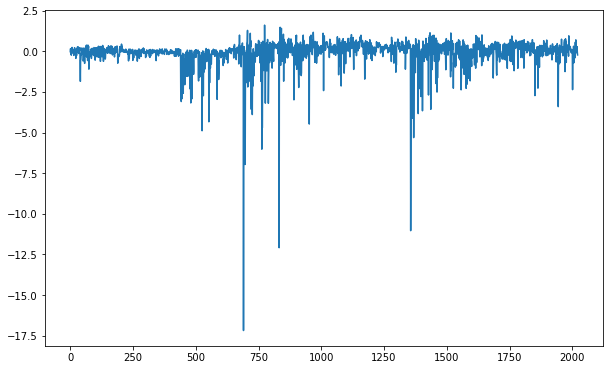

In [57]:
plt.plot(gamma_six_letter_mode10[1922])

In [129]:
B = six_letter_mode10['B']
cutoff = 1800
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)
B_new = np.linalg.inv(filtered_B_inv)

In [137]:
from cvxopt import matrix, solvers
A_B = six_letter_mode10
# B = A_B['B']
B = B_new
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')
additional_constraint = np.diag([-1]*n)
G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-5, -0]+[15]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  1.1533e+04 -7.2187e+04  8e+05  1e+00  1e+03
 1:  1.9658e+02 -1.5977e+05  2e+05  3e-01  3e+02
 2:  5.2408e+03 -7.9486e+04  9e+04  5e-02  4e+01
 3:  1.0509e+03 -1.1055e+04  1e+04  5e-03  4e+00
 4:  1.0486e+02 -1.1795e+03  1e+03  3e-04  2e-01
 5:  8.7970e+00 -6.4500e+01  7e+01  6e-06  6e-03
 6:  2.1699e+00 -7.5332e-01  3e+00  9e-08  8e-05
 7:  1.2622e+00  9.7729e-01  3e-01  6e-10  5e-07
 8:  1.1087e+00  1.0727e+00  4e-02  2e-16  5e-12
 9:  1.0824e+00  1.0802e+00  2e-03  2e-16  2e-11
10:  1.0804e+00  1.0804e+00  2e-05  2e-16  3e-10
11:  1.0804e+00  1.0804e+00  2e-07  2e-16  2e-10
Optimal solution found.


In [138]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

4.810418906009377 1.0394105165706602 5.000000000016477 -1.7050777584754514e-06


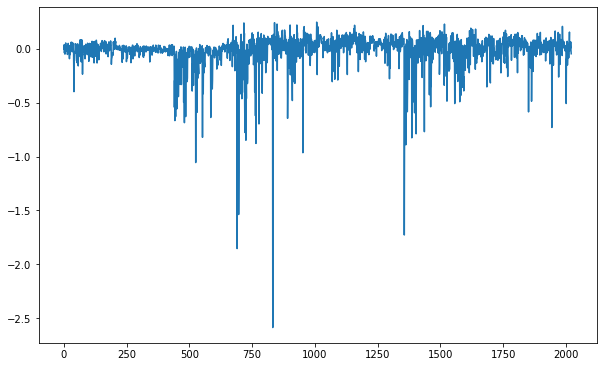

In [139]:
plt.plot(x)

In [140]:
np.argmin(x)

832

In [141]:
x[690]

-1.852848324949107

In [142]:
x[832]

-2.584734417671857

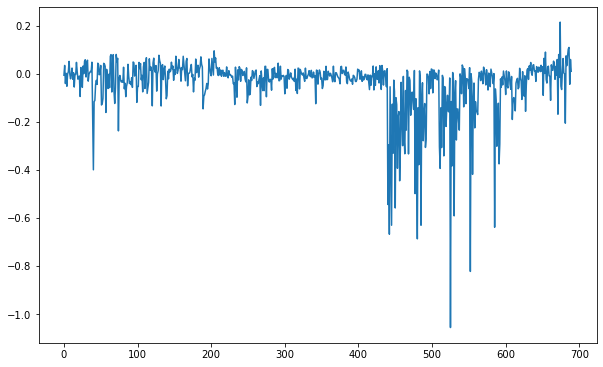

In [143]:
plt.plot(x[:690])

In [145]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/complete_contact_part.dat", x[:690])
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/gamma_folder/complete_fourBody_part.dat", -x[690:])